## Install npgamma

The following cell uncommented will install npgamma

In [1]:
# !pip install npgamma

## Imports dependencies for example

In [2]:
import dicom
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import urllib.request

from npgamma import calc_gamma_3d

## Load example data

In [3]:
urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/SimonBiggs/npgamma/master/data_evaluation.dcm", 
    "data_evaluation.dcm")

urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/SimonBiggs/npgamma/master/data_reference.dcm", 
    "data_reference.dcm")

ds_ref = dicom.read_file("data_reference.dcm")
ds_evl = dicom.read_file("data_evaluation.dcm")

## Import the dose from the dicom file

In [4]:
pixel_reference = np.transpose(ds_ref.pixel_array, (2, 1, 0))
pixel_evaluation = np.transpose(ds_evl.pixel_array, (2, 1, 0))

normalisation = 100 / np.max(pixel_reference)

dose_reference = pixel_reference * normalisation
dose_evaluation = pixel_evaluation * normalisation

## Determine x, y, and z from dicom file

In [5]:
resolution = np.array(ds_ref.PixelSpacing).astype(float)

dx = resolution[0]
x = ds_ref.ImagePositionPatient[0] + np.arange(0, ds_ref.Rows * dx, dx)

dy = resolution[1]
y = ds_ref.ImagePositionPatient[1] + np.arange(0, ds_ref.Columns * dy, dy)

In [6]:
z = np.array(ds_ref.GridFrameOffsetVector) + ds_ref.ImagePositionPatient[2]

relevant_slice = np.max(dose_evaluation, axis=(0, 1)) > 20
slice_start = np.max([np.where(relevant_slice)[0][0] - 2, 0])
slice_end = np.min([np.where(relevant_slice)[0][-1] + 2, len(z)])
z = z[relevant_slice]

dose_evaluation = dose_evaluation[:,:, relevant_slice]
dose_reference = dose_reference[:,:, relevant_slice]

## Calculate the 3d gamma index

In [7]:
x_new, y_new, z_new, gamma = calc_gamma_3d(x, y, z, dose_evaluation, dose_reference,
              distance_threshold=3, dose_threshold=5, max_test_dist=6)

## Time how long the calculation takes

In [8]:
%%timeit

x_new, y_new, z_new, gamma = calc_gamma_3d(x, y, z, dose_evaluation, dose_reference,
              distance_threshold=3, dose_threshold=5, max_test_dist=6)

1 loops, best of 3: 353 ms per loop


## Display relevant gamma

In [9]:
x_start = np.where(x_new[0] == x)[0][0]
x_end = np.where(x_new[-1] == x)[0][0]
y_start = np.where(y_new[0] == y)[0][0]
y_end = np.where(y_new[-1] == y)[0][0]
z_start = np.where(z_new[0] == z)[0][0]
z_end = np.where(z_new[-1] == z)[0][0]

relevant_gamma_ref = dose_evaluation[
    y_start:y_end, x_start:x_end, z_start:z_end] > 20
relevant_gamma = gamma[relevant_gamma_ref]
relevant_less_than_1 = np.sum(relevant_gamma < 1) / len(relevant_gamma)

print("{0:.2f}% of relevant points have gamma < 1".format(100 * relevant_less_than_1))

94.82% of relevant points have gamma < 1


## Draw colour washes representing the relevant slices

Slice = -62.5
79.10% of relevant points have gamma < 1


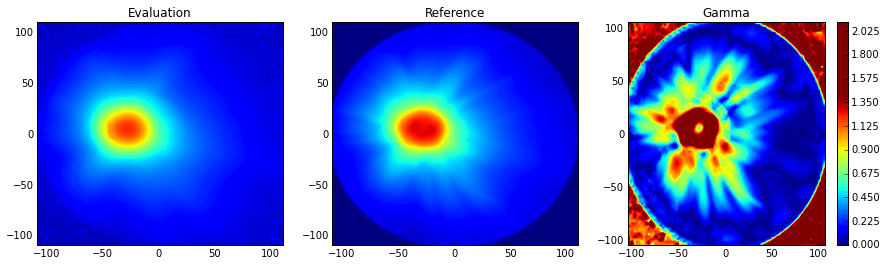

Slice = -60.0
85.56% of relevant points have gamma < 1


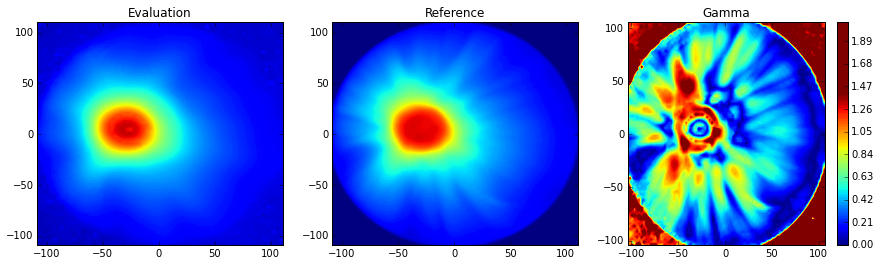

Slice = -57.5
96.10% of relevant points have gamma < 1


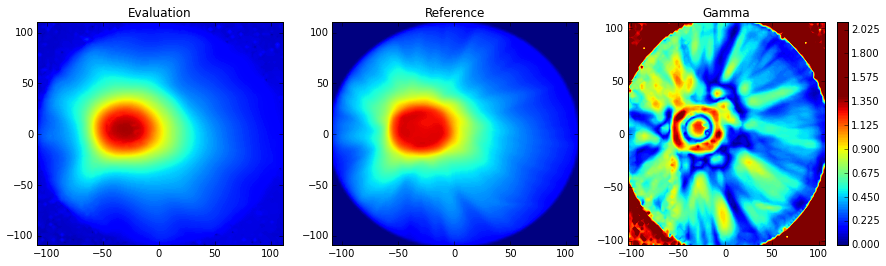

Slice = -55.0
92.14% of relevant points have gamma < 1


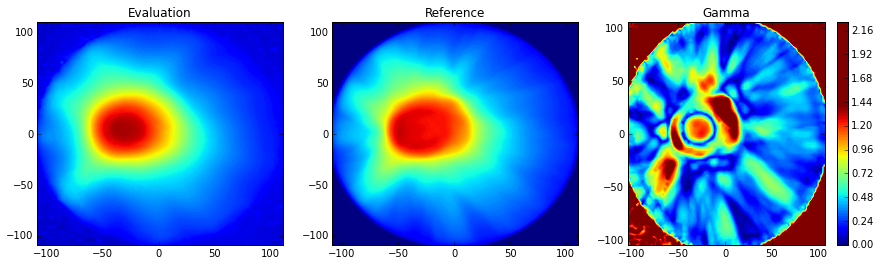

Slice = -52.5
91.59% of relevant points have gamma < 1


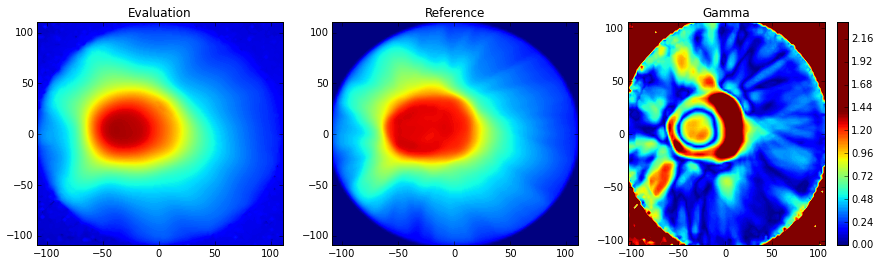

Slice = -50.0
94.58% of relevant points have gamma < 1


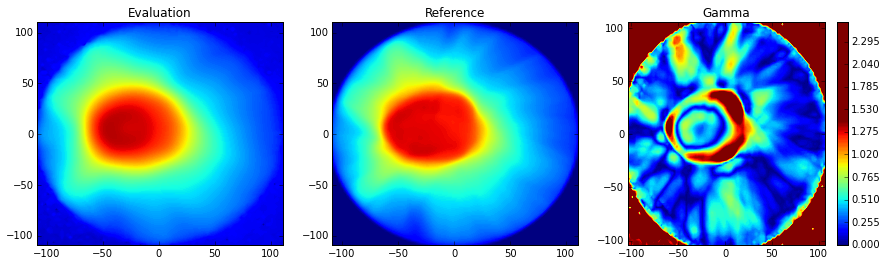

Slice = -47.5
96.74% of relevant points have gamma < 1


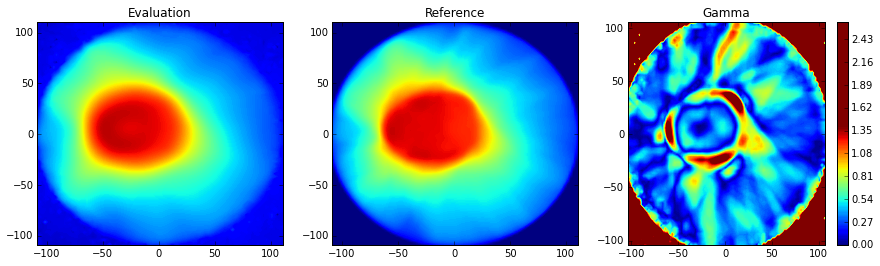

Slice = -45.0
97.72% of relevant points have gamma < 1


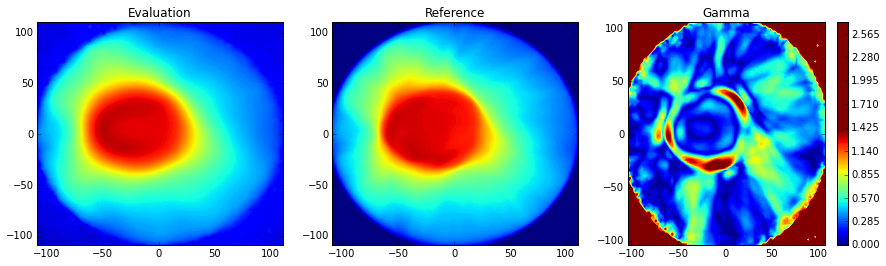

Slice = -42.5
97.68% of relevant points have gamma < 1


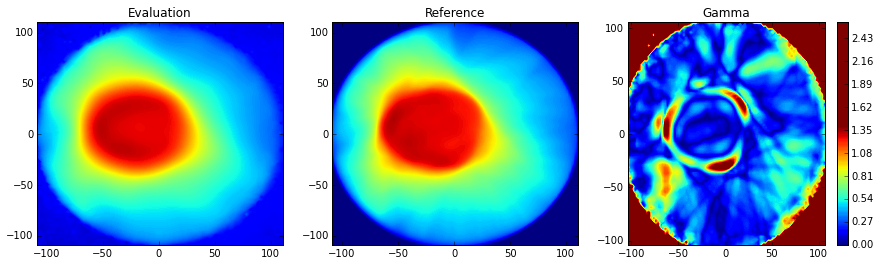

Slice = -40.0
97.51% of relevant points have gamma < 1


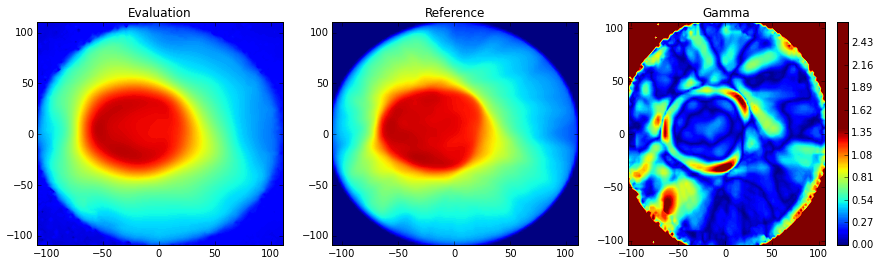

Slice = -37.5
97.86% of relevant points have gamma < 1


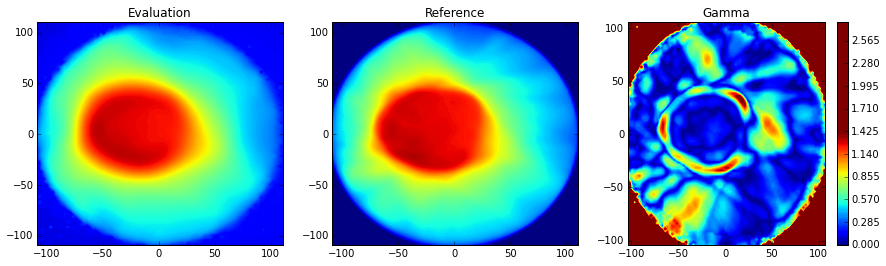

Slice = -35.0
99.30% of relevant points have gamma < 1


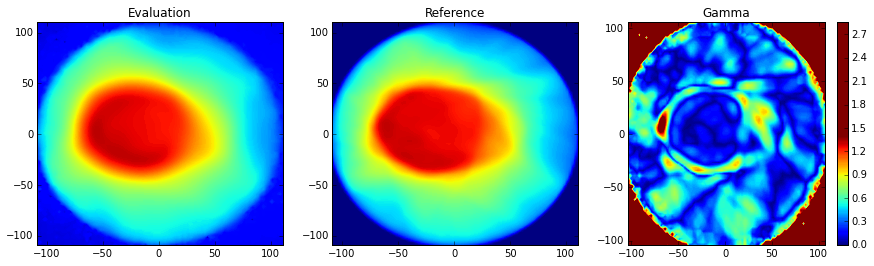

Slice = -32.5
92.53% of relevant points have gamma < 1


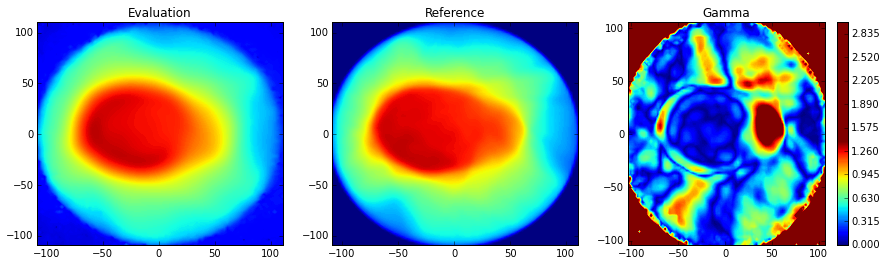

Slice = -30.0
90.43% of relevant points have gamma < 1


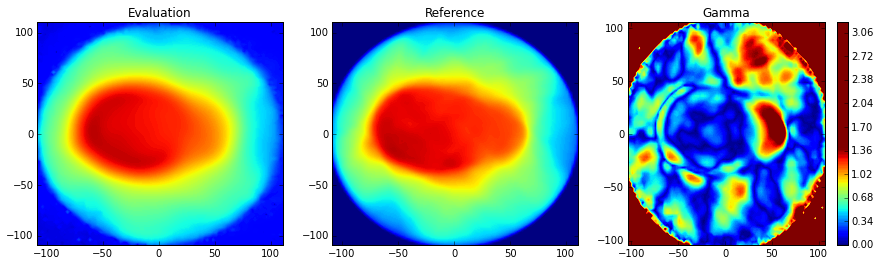

Slice = -27.5
93.99% of relevant points have gamma < 1


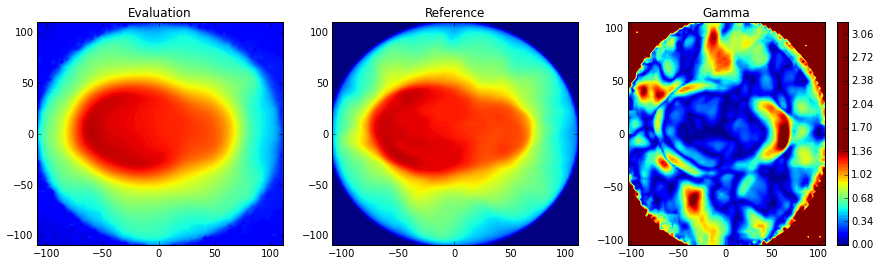

Slice = -25.0
95.44% of relevant points have gamma < 1


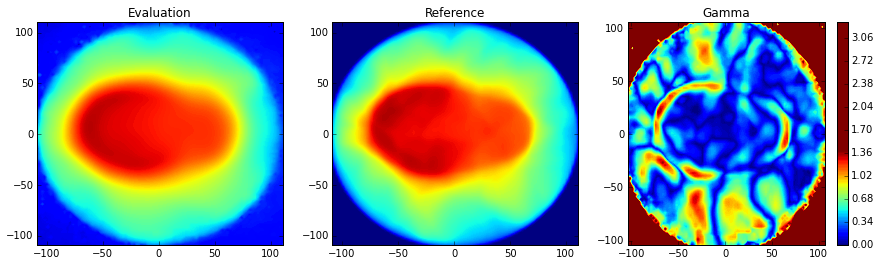

Slice = -22.5
97.63% of relevant points have gamma < 1


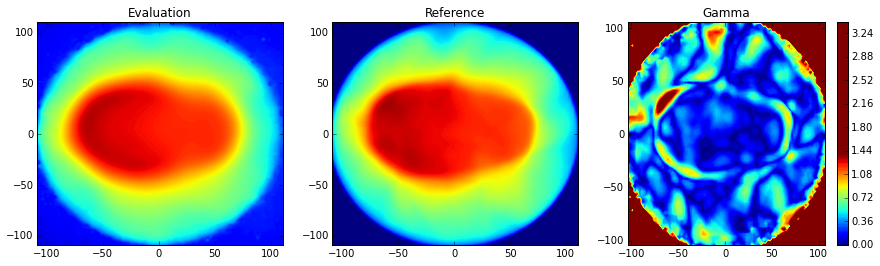

Slice = -20.0
96.91% of relevant points have gamma < 1


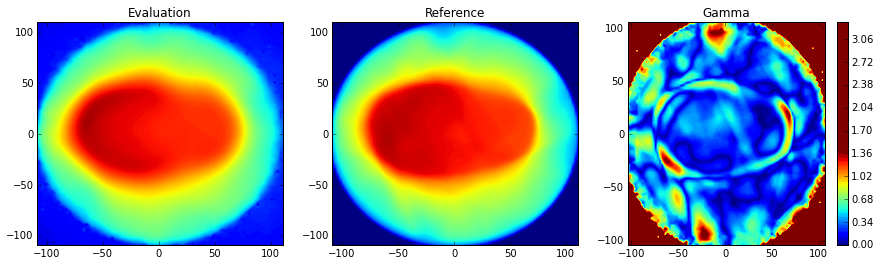

Slice = -17.5
98.61% of relevant points have gamma < 1


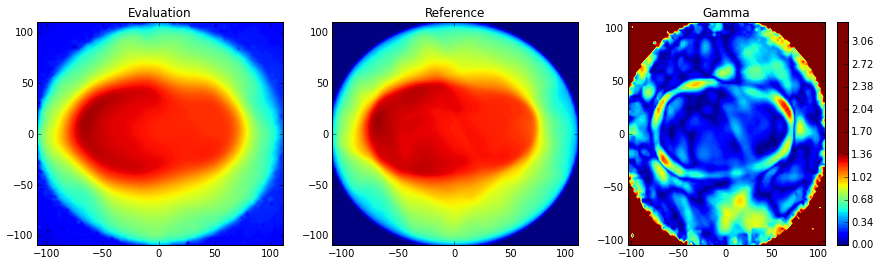

Slice = -15.0
92.95% of relevant points have gamma < 1


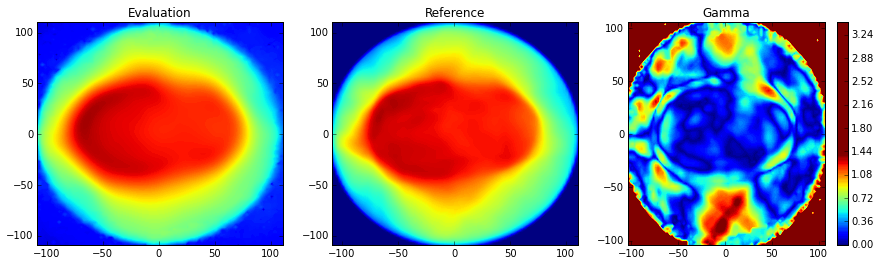

Slice = -12.5
93.42% of relevant points have gamma < 1


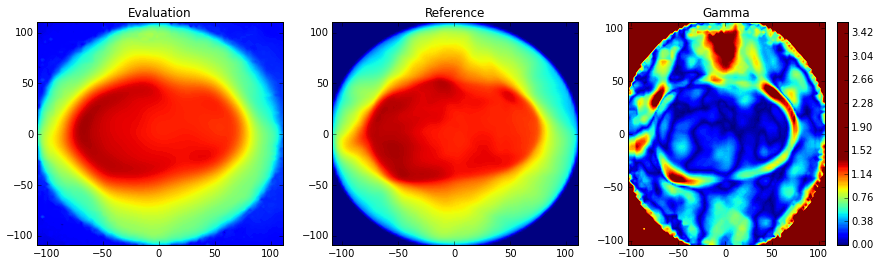

Slice = -10.0
93.26% of relevant points have gamma < 1


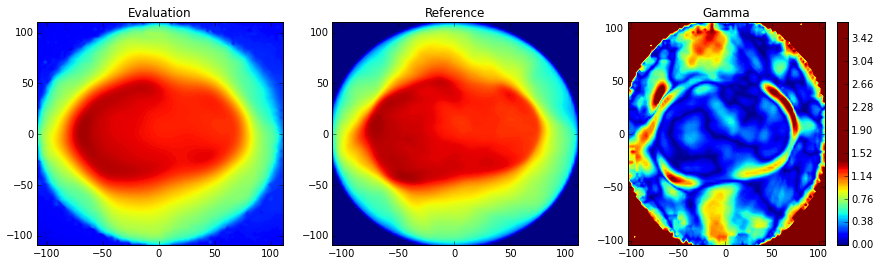

Slice = -7.5
93.70% of relevant points have gamma < 1


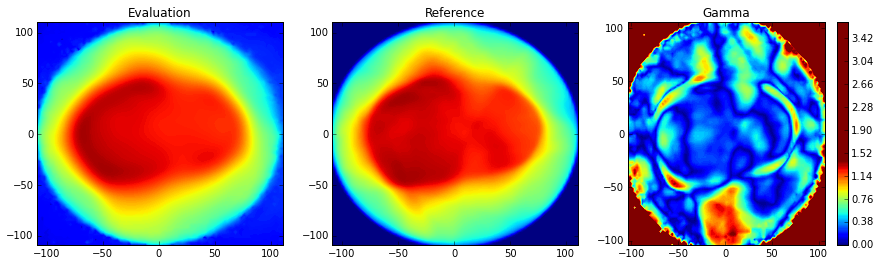

Slice = -5.0
96.46% of relevant points have gamma < 1


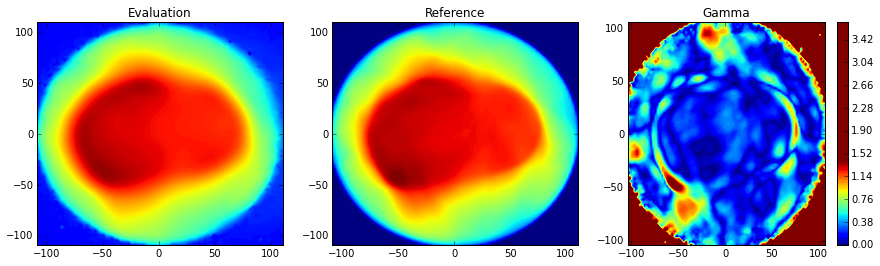

Slice = -2.5
90.33% of relevant points have gamma < 1


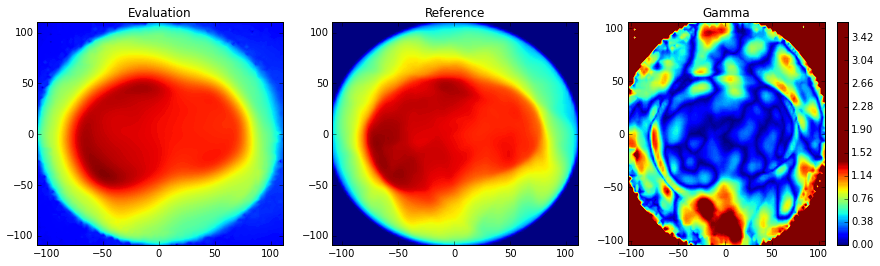

Slice = 0.0
91.80% of relevant points have gamma < 1


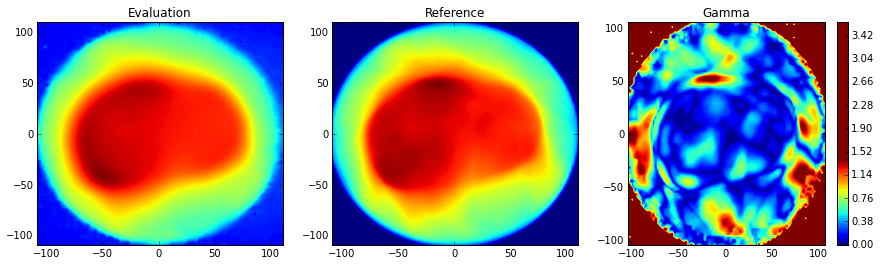

Slice = 2.5
95.38% of relevant points have gamma < 1


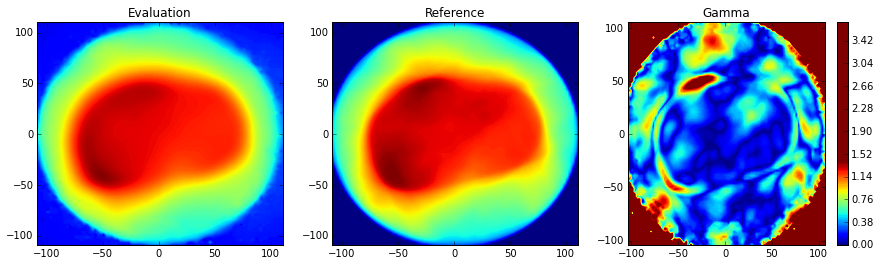

Slice = 5.0
95.85% of relevant points have gamma < 1


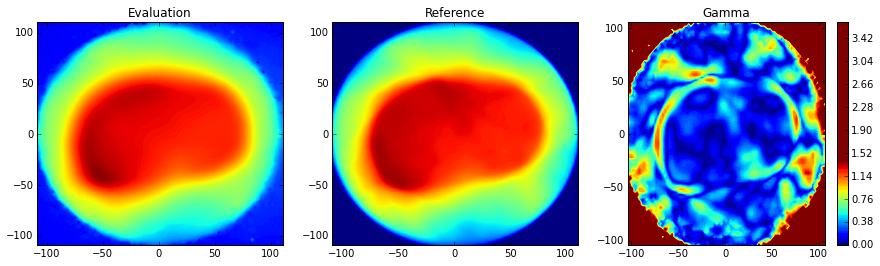

Slice = 7.5
90.24% of relevant points have gamma < 1


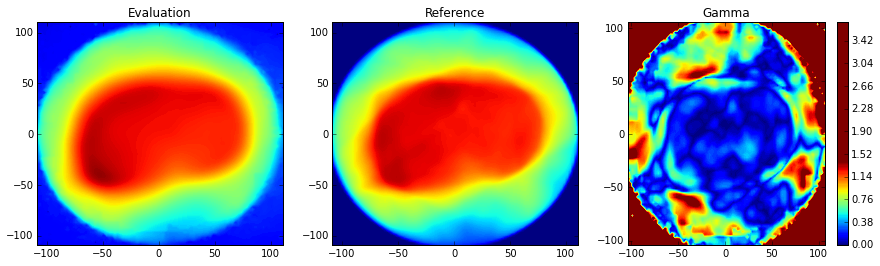

Slice = 10.0
94.62% of relevant points have gamma < 1


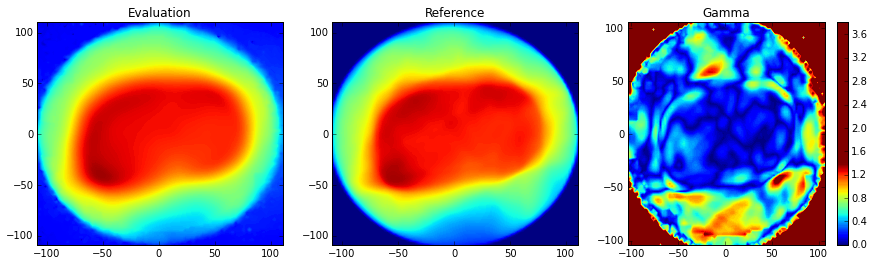

Slice = 12.5
97.07% of relevant points have gamma < 1


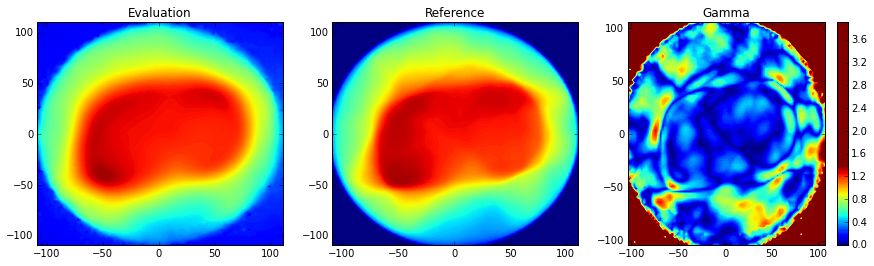

Slice = 15.0
94.99% of relevant points have gamma < 1


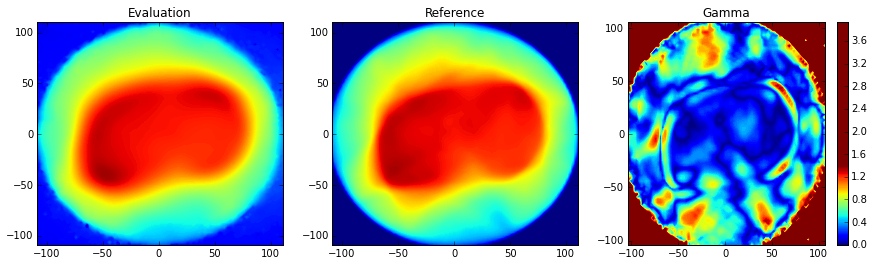

Slice = 17.5
93.39% of relevant points have gamma < 1


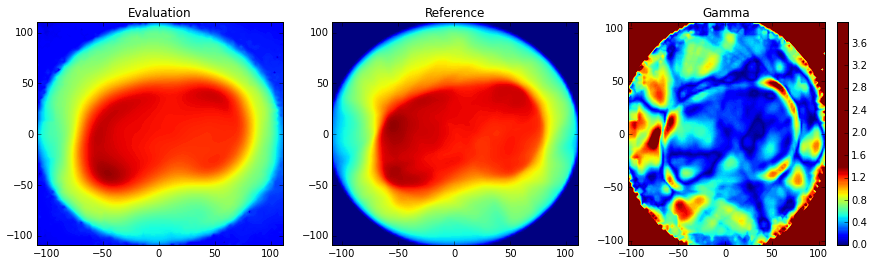

Slice = 20.0
93.43% of relevant points have gamma < 1


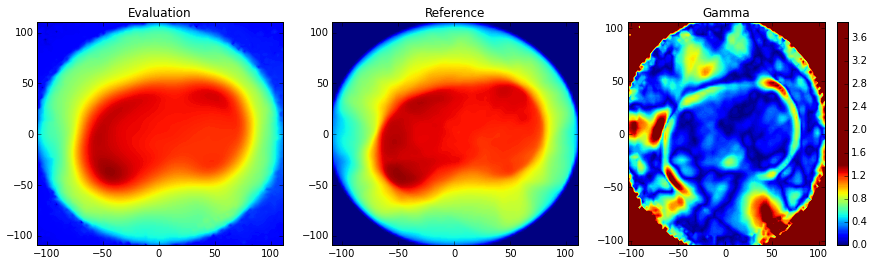

Slice = 22.5
96.06% of relevant points have gamma < 1


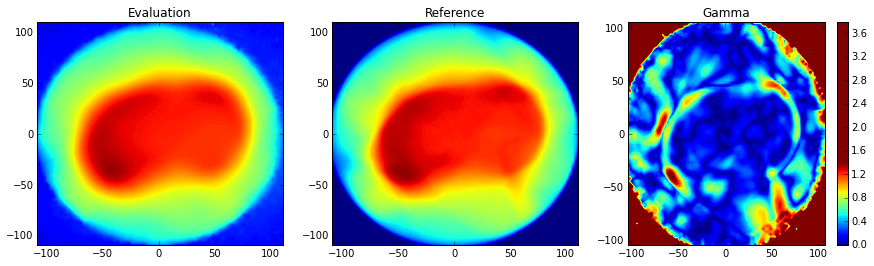

Slice = 25.0
97.30% of relevant points have gamma < 1


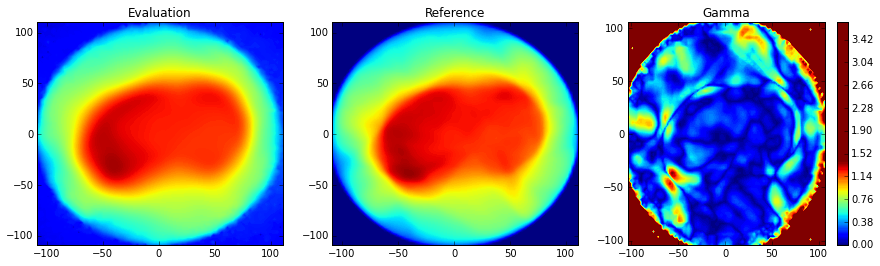

Slice = 27.5
96.74% of relevant points have gamma < 1


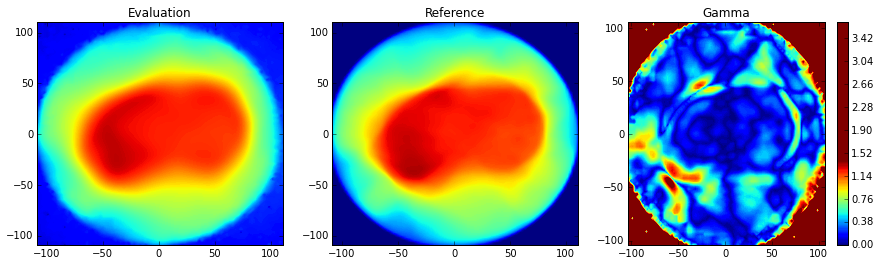

Slice = 30.0
95.29% of relevant points have gamma < 1


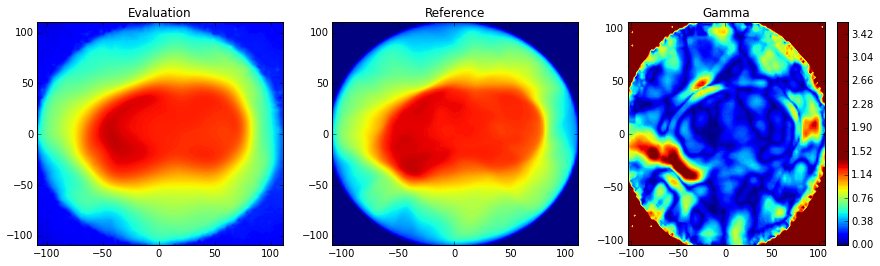

Slice = 32.5
95.64% of relevant points have gamma < 1


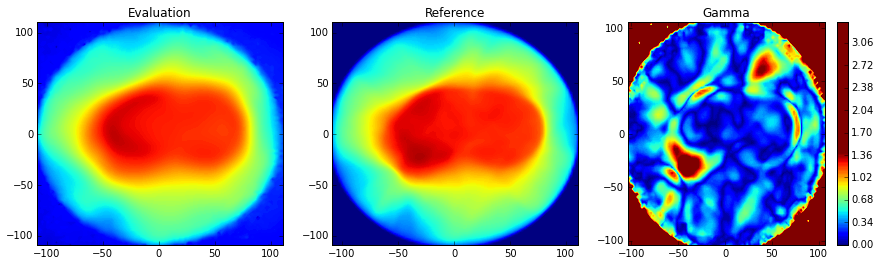

Slice = 35.0
97.14% of relevant points have gamma < 1


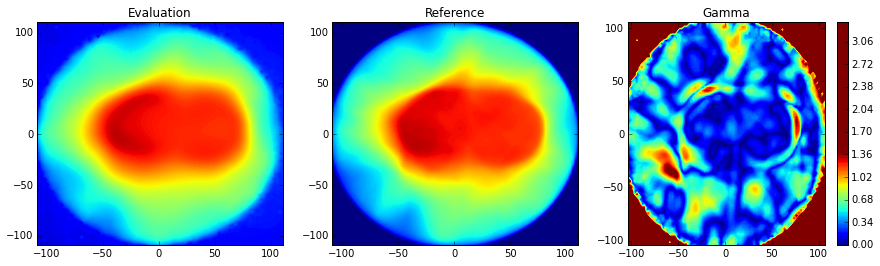

Slice = 37.5
92.86% of relevant points have gamma < 1


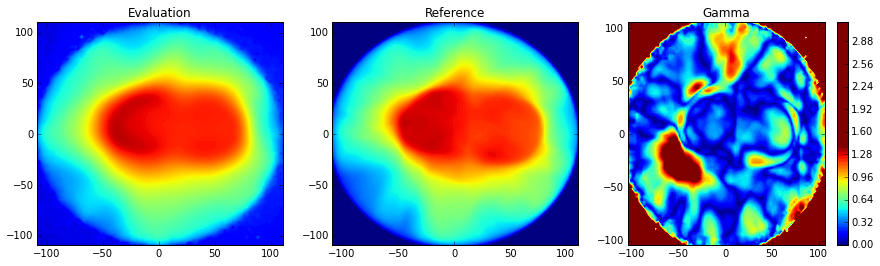

Slice = 40.0
93.70% of relevant points have gamma < 1


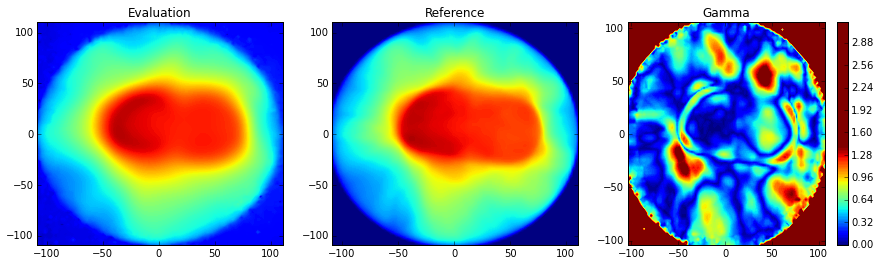

Slice = 42.5
94.22% of relevant points have gamma < 1


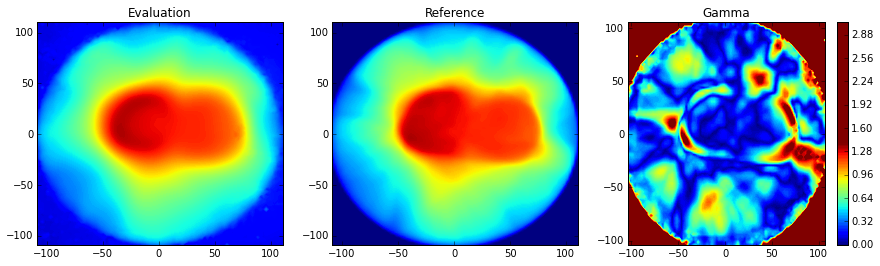

Slice = 45.0
90.72% of relevant points have gamma < 1


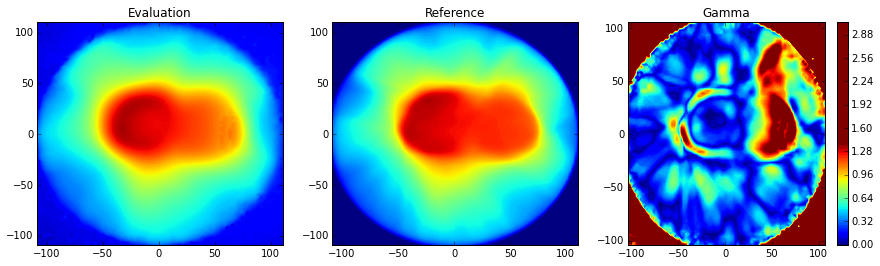

Slice = 47.5
91.49% of relevant points have gamma < 1


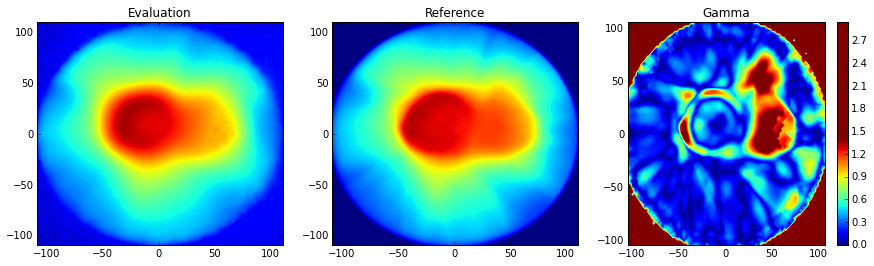

Slice = 50.0
97.42% of relevant points have gamma < 1


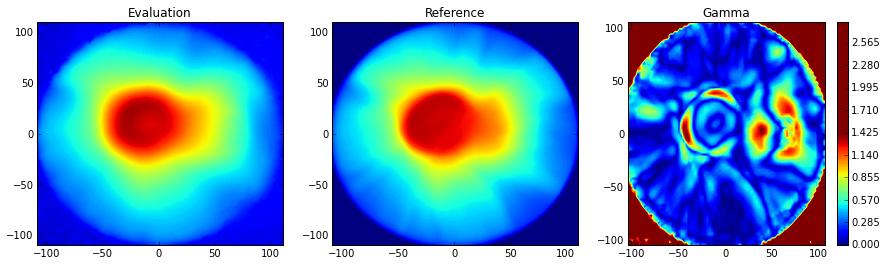

Slice = 52.5
94.66% of relevant points have gamma < 1


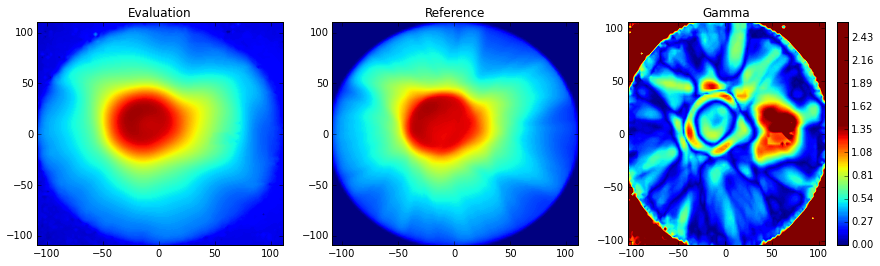

Slice = 55.0
97.49% of relevant points have gamma < 1


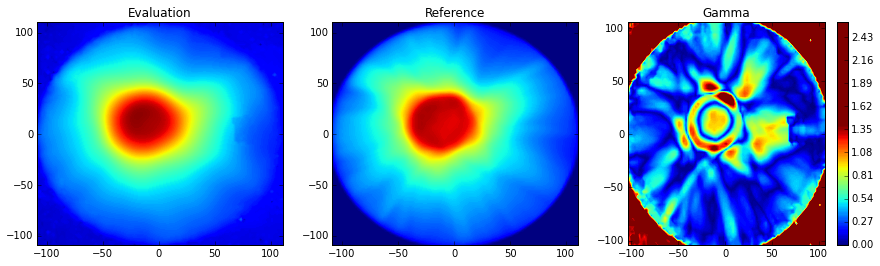

Slice = 57.5
96.60% of relevant points have gamma < 1


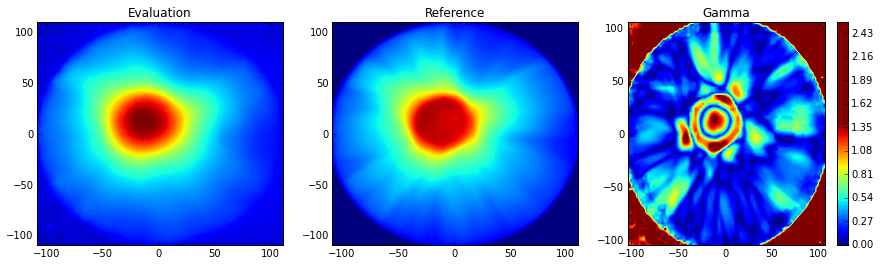

Slice = 60.0
97.55% of relevant points have gamma < 1


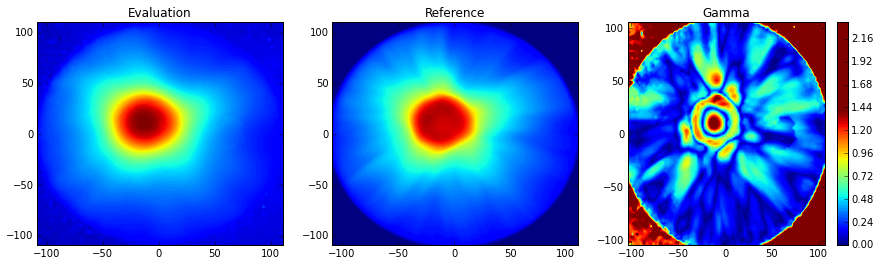

Slice = 62.5
99.28% of relevant points have gamma < 1


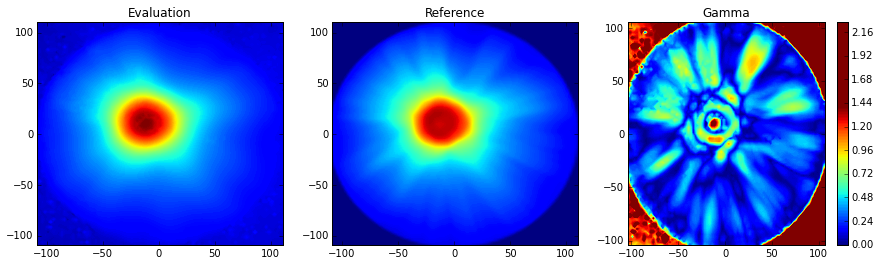

Slice = 65.0
97.80% of relevant points have gamma < 1


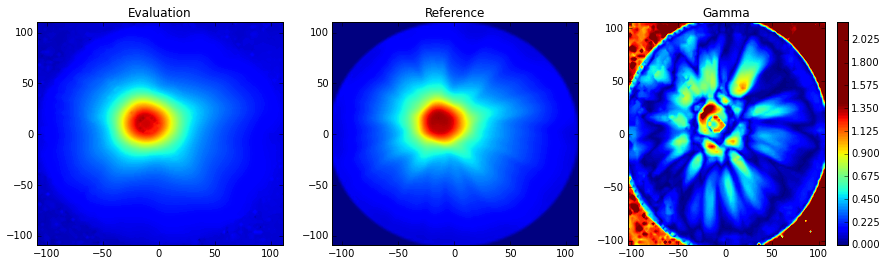

Slice = 67.5
94.46% of relevant points have gamma < 1


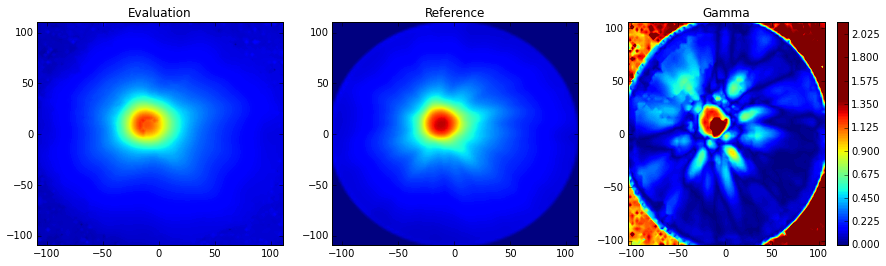

In [10]:
for i, z_i in enumerate(z_new):
    j = np.where(z_i == z)[0][0]
    print("Slice = {0}".format(z_i))
    
    relevant_gamma_ref = dose_evaluation[y_start:y_end, x_start:x_end, j] > 20
    relevant_gamma = gamma[relevant_gamma_ref, i]
    relevant_less_than_1 = np.sum(relevant_gamma < 1) / len(relevant_gamma)
    
    print("{0:.2f}% of relevant points have gamma < 1".format(100 * relevant_less_than_1))
    
    fig = plt.figure(figsize=(15,4))
    ax1 = fig.add_subplot(131) 
    ax2 = fig.add_subplot(132) 
    ax3 = fig.add_subplot(133) 
    
    ax1.contourf(x, y, dose_evaluation[:, :, j], 200, vmin=0, vmax=100)
    ax1.set_title("Evaluation")
    
    ax2.contourf(x, y, dose_reference[:, :, j], 200, vmin=0, vmax=100)
    ax2.set_title("Reference")
    
    c = ax3.contourf(x_new, y_new, gamma[:, :, i], 200, vmin=0, vmax=1.4)
    ax3.set_title("Gamma")
    
    fig.colorbar(c)
    
    plt.show()